In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx

from graph_reinforcement_learning_using_blockchain_data import config

config.load_dotenv()

True

In [38]:
data = torch.load(config.EXTERNAL_DATA_DIR / "arbinet" / "train_dataset.pt", weights_only=False)

In [46]:
train_loader = DataLoader(data[:3], batch_size=256, shuffle=True)
for d in train_loader:
    print(d.edge_index)
    print(d.tx)
    print(d.batch)
    print(d.ptr)
    print(d.x)
    print(d.y)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  7,  9, 10,  7],
        [ 1,  2,  0,  4,  5,  3,  7,  8,  9,  7,  6, 10]], dtype=torch.int32)
['0x212cd96ab400af1d7346d98ed358ee65e134c35fda5802d7e7df5e06fedced90', '0x8fddb098c6672db74a56d297c589f629809550b2fffa5de2975a31226ee439f6', '0x5ece3b059b7d8ab624f5e9ba6b680c8e06e81038216626f8090ee1f353c06095']
tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2])
tensor([ 0,  3,  6, 11])
tensor([[1., 1., 0., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 3.],
        [1., 1., 0., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 3.],
        [0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 3.],
        [1., 1., 0., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 3.],
        [0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 3.],
        [1., 1., 0., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 3.],
        [1., 1., 1., 1., 1., 3., 1., 1., 1., 0., 0., 1., 1., 6.],
        [0., 0., 3., 2., 2., 3., 1., 1., 1., 0., 1., 3., 3., 6.],
        [0., 1., 2., 0., 1., 3., 1., 1., 0., 0., 0., 0., 0

In [24]:
def visualize_graph(G, color):
    plt.figure(figsize=(7, 7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(
        G, pos=nx.spring_layout(G, seed=42), with_labels=True, node_color=color, cmap="Set2"
    )
    nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G, seed=42))
    plt.show()

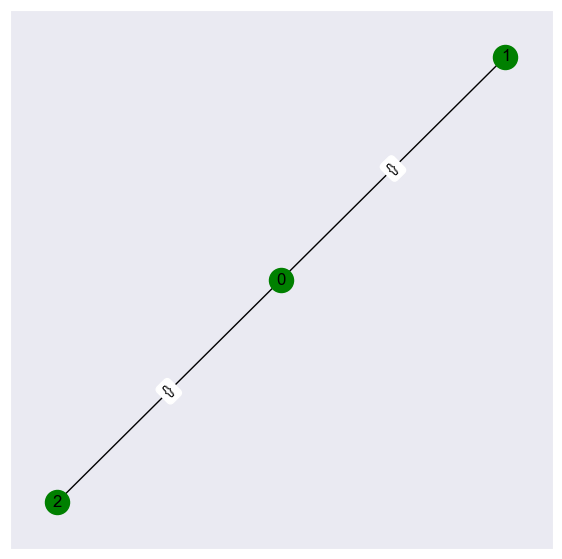

In [25]:
G = to_networkx(d[3], to_undirected=True)
visualize_graph(G, color="green")